In [1]:
#7*1
import numpy as np
import matplotlib.pyplot as plt
data_exp = np.loadtxt('C:/msys64/home/wangy/experiment-control/matlab_new/analysis/scripts/12_2_22_sim/expdata20221202113710.csv',delimiter=',')
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_8/Overlap2022_12_08_11_32_54_L13_1',delimiter=',')
z =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_8/z_2022_12_08_11_32_54_L13_1',delimiter=',')

In [2]:
# data_id = np.argmin(np.abs(data[0][np.newaxis,:]-data_exp[0][:,np.newaxis]),axis=1)
# print(data_id)
# print
# print(data[0][data_id])
data_id = []
for i in data_exp[0,1:]:
    Id = np.argmin(abs(data[0]-i))
    data_id.append(Id)
print(data_exp[0,1:])    
print(data_id)
print(data[0,data_id])

[2.15 2.3  2.45 2.6  2.75 3.6 ]
[423, 452, 481, 511, 540, 705]
[2.15136 2.29984 2.44832 2.60192 2.7504  3.5952 ]


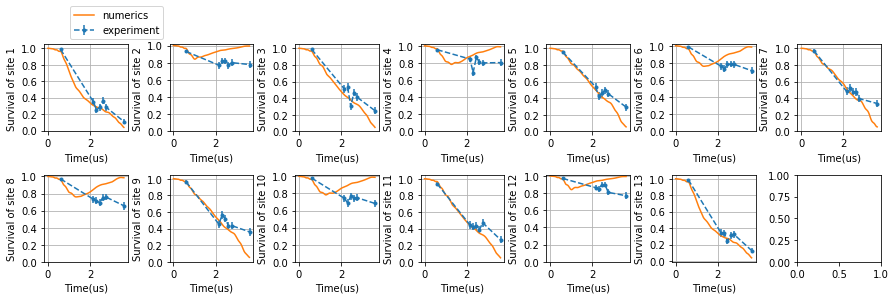

0.08167889466526734


In [3]:
N = 13

fig,ax = plt.subplots(ncols = 7 ,nrows=2,figsize=(15,4))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0

for i in range(N):
    n = 1-(z[:,i]+1)/2
    ax[i//7,i%7].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//7,i%7].plot(data[0],n,label='numerics')
    ax[i//7,i%7].set_yticks([0,0.2,0.4,0.6,0.8,1])
    standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
    ax[i//7,i%7].grid()
    ax[i//7,i%7].set_xlabel('Time(us)')
    ax[i//7,i%7].set_ylabel('Survival of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
ax[0,0].legend(bbox_to_anchor =(0.25, 1))

plt.show()
print((standard_deviation**0.5)/N)

In [4]:
eta = 0.004;
eps = 0.06;
epsp = 0.04;
def n_c(n):
    corrected_measure_vals = eta * eps + (1 - eta) * (eps * (1 - n) + (1 - epsp + eps * epsp) * n)
    return corrected_measure_vals

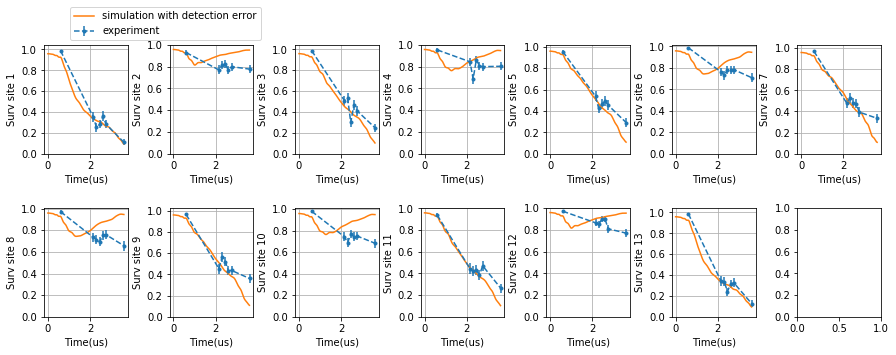

0.06266326316149207


In [5]:
N = 13

fig,ax = plt.subplots(ncols = 7 ,nrows=2,figsize=(15,5))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0
for i in range(N):
    n = 1-(z[:,i]+1)/2
    ax[i//7,i%7].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//7,i%7].plot(data[0],n_c(n),label='simulation with detection error')
    ax[i//7,i%7].set_yticks([0,0.2,0.4,0.6,0.8,1])
    standard_deviation +=sum(n_c(n)[data_id]-data_exp[i+1,1:])**2/len(data_id)
    ax[i//7,i%7].grid()

    ax[i//7,i%7].set_xlabel('Time(us)')
    ax[i//7,i%7].set_ylabel('Surv site '+ str(i+1))
ax[0,0].legend(bbox_to_anchor =(0.25, 1))
plt.show()
print((standard_deviation**0.5)/N)

Text(0, 0.5, 'overlap with 1st excited state')

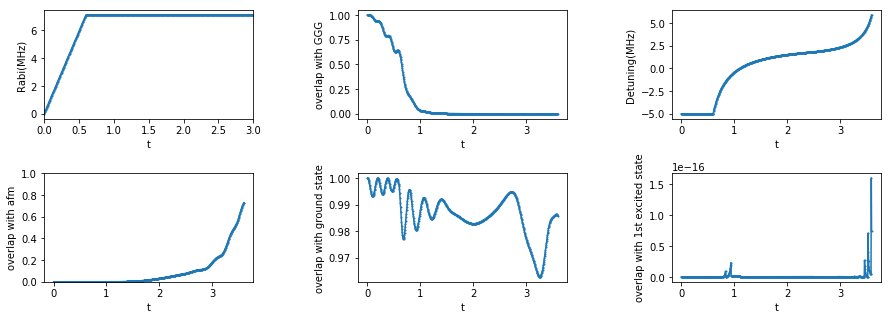

In [36]:
ig, ax = plt.subplots(2, 3, figsize=(15,5))
#fig.suptitle('19 Atoms')
MS = 1
LS = '-'
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,2].plot(data[0],data[1],marker='o',markersize=MS,ls=LS)
ax[0,2].set_xlabel('t')
ax[0,2].set_ylabel('Detuning(MHz)')
ax[0,0].plot(data[0],data[2],marker='o',markersize=MS,ls=LS)
ax[0,0].set_xlabel('t')
ax[0,0].set_xlim([0,3])
ax[0,0].set_ylabel('Rabi(MHz)')
ax[0,1].plot(data[0],data[3],marker='o',markersize=MS,ls=LS)
ax[0,1].set_xlabel('t')
ax[0,1].set_ylabel('overlap with GGG')
ax[1,0].plot(data[0],data[4],marker='o',markersize=MS,ls=LS)
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('overlap with afm')

ax[1,1].plot(data[0],data[5],marker='o',markersize=MS,ls=LS)
ax[1,1].set_xlabel('t')
ax[1,1].set_ylabel('overlap with ground state')

ax[1,2].plot(data[0],data[7],marker='o',markersize=MS,ls=LS)
ax[1,2].set_xlabel('t')
ax[1,2].set_ylabel('overlap with 1st excited state')


In [39]:
print('Overlap with AFM after the ramp: '+ str(data[4][-1]))

Overlap with AFM after the ramp: 0.7276186960699685


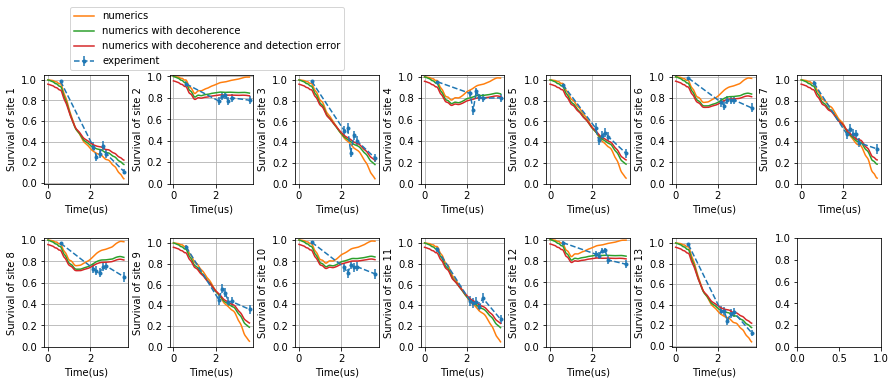

uncorrected SD = 0.081679
corrected SD = 0.027125


In [8]:
#corrected for the decoherence 

fig,ax = plt.subplots(ncols = 7 ,nrows=2,figsize=(15,5))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0
end = 0.5 
t0 = 10
standard_deviation_with_correction = 0

for i in range(N):
    n = 1-(z[:,i]+1)/2  
    decayed_n = (n[:]-end)*np.exp(-data[0,:]/t0)+end

    ax[i//7,i%7].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//7,i%7].plot(data[0],n,label='numerics')
    ax[i//7,i%7].plot(data[0],decayed_n,label='numerics with decoherence')
    ax[i//7,i%7].plot(data[0],n_c(decayed_n),label='numerics with decoherence and detection error')

    ax[i//7,i%7].set_yticks([0,0.2,0.4,0.6,0.8,1])
    standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
    standard_deviation_with_correction += sum((n_c(decayed_n))[data_id]-data_exp[i+1,1:])**2/len(data_id)

    ax[i//7,i%7].grid()
    ax[i//7,i%7].set_xlabel('Time(us)')
    ax[i//7,i%7].set_ylabel('Survival of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
ax[0,0].legend(bbox_to_anchor =(0.25, 1))

plt.show()
print('uncorrected SD = %3f' % (standard_deviation**0.5/N))
print('corrected SD = %3f'% (standard_deviation_with_correction**0.5/N))